In [7]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from hamiltonian import hamiltonian_para, plot, stochastic_normalize, calculate_Delta_ji, generate_delta, bf
from qannealing import annealing
from data_score import Generate_Data
import heapq
from operator import itemgetter
from analysis_toolkit import res_draw, res_extractor
import numpy as np


In [8]:
M = 100
T = 10
lamda = 1
n = 4
m = 2

In [19]:
D = Generate_Data(n)
Delta_ji = calculate_Delta_ji(n, m, D)
delta_max_i, delta_consist_ij, delta_trans_ijk = generate_delta(Delta_ji, 1.5, 50)
print(delta_max_i, delta_consist_ij, delta_trans_ijk)


[50. 50. 50. 50.] [[50.         71.20987752 71.20987752 50.        ]
 [50.         50.         71.20987752 50.        ]
 [50.         50.         50.         50.        ]
 [50.         50.         50.         50.        ]] [[[50. 50. 50. 50.]
  [50. 50. 50. 50.]
  [50. 50. 50. 50.]
  [50. 50. 50. 50.]]

 [[50. 50. 50. 50.]
  [50. 50. 50. 50.]
  [50. 50. 50. 50.]
  [50. 50. 50. 50.]]

 [[50. 50. 50. 50.]
  [50. 50. 50. 50.]
  [50. 50. 50. 50.]
  [50. 50. 50. 50.]]

 [[50. 50. 50. 50.]
  [50. 50. 50. 50.]
  [50. 50. 50. 50.]
  [50. 50. 50. 50.]]]


[] 124.686824529898
[3] 106.59104258305017
[2] 102.39184314491442
[2, 3] 85.18579155945201
[1] 100.95019868871151
[1, 3] 85.33482713861251
[1, 2] 81.973803599084
[1, 2, 3] 68.67530123175553
[] 67.95156255833669
[3] 67.65597445947802
[2] 67.04284164911479
[2, 3] 65.46968039736522
[0] 45.0315510027122
[0, 3] 45.85089541037027
[0, 2] 45.916571680513094
[0, 2, 3] 47.01132565644553
[] 65.74879780062486
[3] 66.47731946313637
[1] 64.88335739976159
[1, 3] 64.44006098018407
[0] 44.313711209561895
[0, 3] 44.67224041402862
[0, 1] 45.22342449995318
[0, 1, 3] 45.981706239264376
[] 58.78839328421646
[2] 59.66308473822425
[1] 58.68225548521271
[1, 2] 58.49185194174712
[0] 41.69867592278552
[0, 2] 42.15073118526302
[0, 1] 42.63623900104476
[0, 1, 2] 43.58785955499201


100%|██████████| 262144/262144 [00:26<00:00, 10002.43it/s]


Brute force results: [('1000000010000111', 1283.1316239505154), ('11000000010000111', 1283.1316239505154), ('111000000010000111', 1283.1316239505154), ('11000010010000111', 1283.1429612087609), ('111000010010000111', 1283.1429612087609), ('10111', 1283.2231350203328), ('100000000000010111', 1283.2231350203328), ('110000000000010111', 1283.2231350203328), ('110000010000010111', 1283.2344722785783), ('111', 1283.39401496238), ('1000000000000111', 1283.39401496238), ('11000000000000111', 1283.39401496238), ('100000000000000111', 1283.39401496238), ('110000000000000111', 1283.39401496238), ('111000000000000111', 1283.39401496238), ('110000010000000111', 1283.4053522206254), ('11000010000000111', 1283.4053522206257), ('111000010000000111', 1283.4053522206257), ('1000000010100111', 1283.4059541636423), ('111100001010000011', 1283.4657170344096), ('111100011010000011', 1283.4770542926553), ('111000100010000111', 1283.4821329971933), ('111000110010000111', 1283.493470255439), ('110111', 1283.4

 23%|██▎       | 60867/262144 [00:00<00:00, 308859.62it/s]

1000000010000111 1283.1316239505154


100%|██████████| 262144/262144 [00:00<00:00, 307056.59it/s]


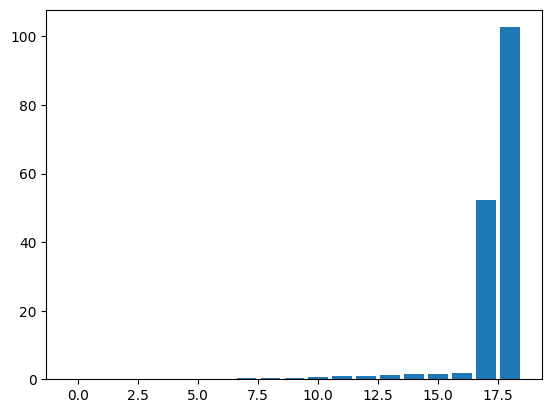

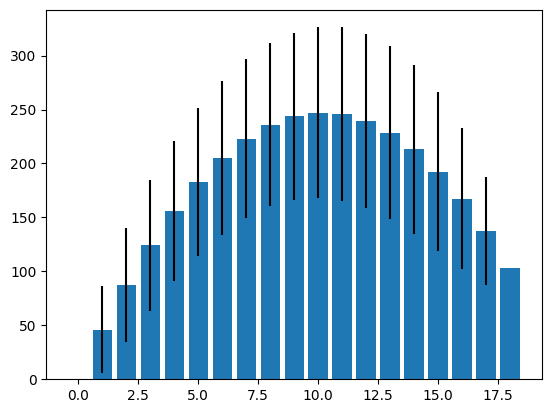

In [30]:
C, h, J = hamiltonian_para(n, m, D, delta_max_i, delta_consist_ij, delta_trans_ijk, 0, 1, use_y=False) # Linear

bf(C, h, J, n)

100%|██████████| 262144/262144 [00:24<00:00, 10510.32it/s]


Brute force results: [('1000000010000111', 1283.1316239505154), ('11000000010000111', 1283.1316239505154), ('111000000010000111', 1283.1316239505154), ('11000010010000111', 1283.1429612087609), ('111000010010000111', 1283.1429612087609), ('10111', 1283.2231350203328), ('100000000000010111', 1283.2231350203328), ('110000000000010111', 1283.2231350203328), ('110000010000010111', 1283.2344722785783), ('111', 1283.39401496238), ('1000000000000111', 1283.39401496238), ('11000000000000111', 1283.39401496238), ('100000000000000111', 1283.39401496238), ('110000000000000111', 1283.39401496238), ('111000000000000111', 1283.39401496238), ('110000010000000111', 1283.4053522206254), ('11000010000000111', 1283.4053522206257), ('111000010000000111', 1283.4053522206257), ('1000000010100111', 1283.4059541636423), ('111100001010000011', 1283.4657170344096), ('111100011010000011', 1283.4770542926553), ('111000100010000111', 1283.4821329971933), ('111000110010000111', 1283.493470255439), ('110111', 1283.4

 22%|██▏       | 57423/262144 [00:00<00:02, 89135.63it/s]

1000000010000111 1283.1316239505154


 44%|████▍     | 115527/262144 [00:01<00:01, 89721.81it/s]

11000000010000111 1283.1316239505154


 93%|█████████▎| 243525/262144 [00:02<00:00, 98838.23it/s]

111000000010000111 1283.1316239505154


100%|██████████| 262144/262144 [00:02<00:00, 93334.47it/s]


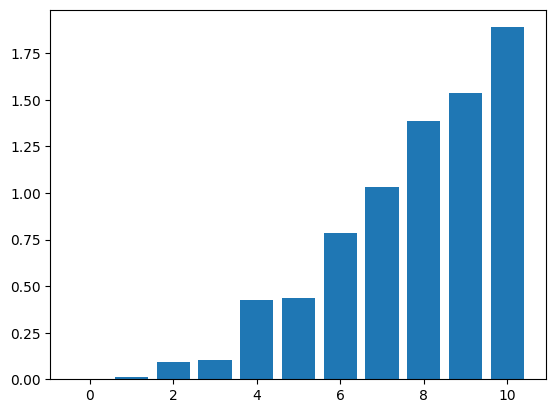

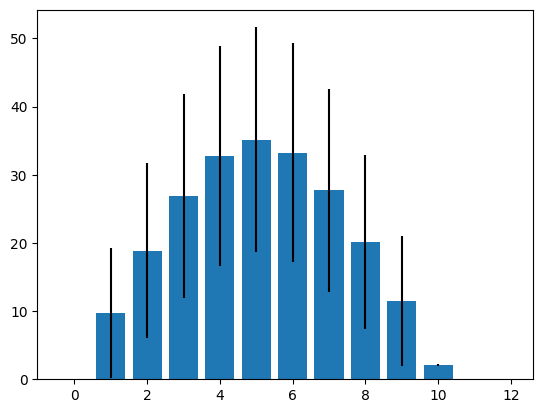

In [29]:
bf(C, h, J, n, dagDist=True)

[] 124.686824529898
[3] 106.59104258305017
[2] 102.39184314491442
[2, 3] 85.18579155945201
[1] 100.95019868871151
[1, 3] 85.33482713861251
[1, 2] 81.973803599084
[1, 2, 3] 68.67530123175553
[] 67.95156255833669
[3] 67.65597445947802
[2] 67.04284164911479
[2, 3] 65.46968039736522
[0] 45.0315510027122
[0, 3] 45.85089541037027
[0, 2] 45.916571680513094
[0, 2, 3] 47.01132565644553
[] 65.74879780062486
[3] 66.47731946313637
[1] 64.88335739976159
[1, 3] 64.44006098018407
[0] 44.313711209561895
[0, 3] 44.67224041402862
[0, 1] 45.22342449995318
[0, 1, 3] 45.981706239264376
[] 58.78839328421646
[2] 59.66308473822425
[1] 58.68225548521271
[1, 2] 58.49185194174712
[0] 41.69867592278552
[0, 2] 42.15073118526302
[0, 1] 42.63623900104476
[0, 1, 2] 43.58785955499201


100%|██████████| 262144/262144 [00:25<00:00, 10271.74it/s]


Brute force results: [('111', 897.6585717012958), ('1000000000000111', 897.6585717012958), ('11000000000000111', 897.6585717012958), ('100000000000000111', 897.6585717012958), ('110000000000000111', 897.6585717012958), ('111000000000000111', 897.6585717012958), ('1000000010000111', 897.7144972789544), ('11000000010000111', 897.7144972789544), ('111000000010000111', 897.7144972789544), ('110100001000000011', 897.7497437305583), ('111100001000000011', 897.7497437305583), ('111100001010000011', 897.8056693082169), ('10111', 897.8133432454048), ('100000000000010111', 897.8133432454048), ('110000000000010111', 897.8133432454048), ('11000010010000111', 897.9024616111101), ('111000010010000111', 897.9024616111101), ('110100001000010011', 897.9045152746673), ('1010000001000101', 897.9581999589957), ('11010000001000101', 897.9581999589957), ('11000010000000111', 897.9718064815286), ('110000010000000111', 897.9718064815286), ('111000010000000111', 897.9718064815286), ('111100011010000011', 897.9

 25%|██▌       | 66665/262144 [00:00<00:00, 330236.97it/s]

111 897.6585717012958


100%|██████████| 262144/262144 [00:00<00:00, 342640.35it/s]


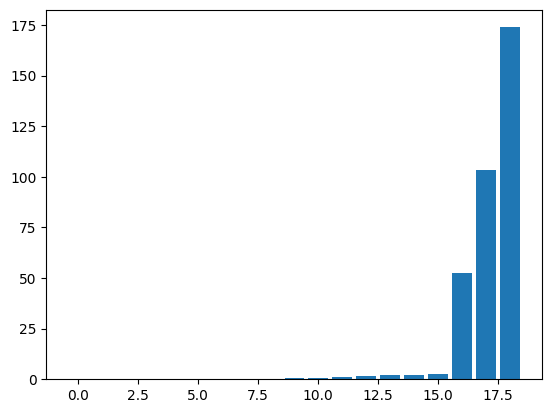

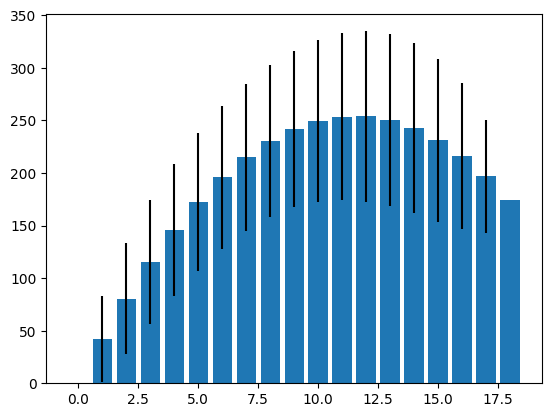

In [31]:
C, h, J = hamiltonian_para(n, m, D, delta_max_i, delta_consist_ij, delta_trans_ijk, 0, 2, use_y=False) # Quadratic

bf(C, h, J, n)

100%|██████████| 262144/262144 [00:25<00:00, 10090.21it/s]


Brute force results: [('111', 897.6585717012958), ('1000000000000111', 897.6585717012958), ('11000000000000111', 897.6585717012958), ('100000000000000111', 897.6585717012958), ('110000000000000111', 897.6585717012958), ('111000000000000111', 897.6585717012958), ('1000000010000111', 897.7144972789544), ('11000000010000111', 897.7144972789544), ('111000000010000111', 897.7144972789544), ('110100001000000011', 897.7497437305583), ('111100001000000011', 897.7497437305583), ('111100001010000011', 897.8056693082169), ('10111', 897.8133432454048), ('100000000000010111', 897.8133432454048), ('110000000000010111', 897.8133432454048), ('11000010010000111', 897.9024616111101), ('111000010010000111', 897.9024616111101), ('110100001000010011', 897.9045152746673), ('1010000001000101', 897.9581999589957), ('11010000001000101', 897.9581999589957), ('11000010000000111', 897.9718064815286), ('110000010000000111', 897.9718064815286), ('111000010000000111', 897.9718064815286), ('111100011010000011', 897.9

  7%|▋         | 19051/262144 [00:00<00:02, 95260.00it/s]

111 897.6585717012958


 19%|█▊        | 48655/262144 [00:00<00:02, 96529.97it/s]

1000000000000111 897.6585717012958


 45%|████▍     | 117754/262144 [00:01<00:01, 98304.85it/s]

11000000000000111 897.6585717012958


 56%|█████▌    | 147066/262144 [00:01<00:01, 96085.58it/s]

100000000000000111 897.6585717012958


 83%|████████▎ | 217983/262144 [00:02<00:00, 99792.74it/s]

110000000000000111 897.6585717012958


 95%|█████████▍| 247953/262144 [00:02<00:00, 97409.20it/s] 

111000000000000111 897.6585717012958


100%|██████████| 262144/262144 [00:02<00:00, 96349.39it/s]


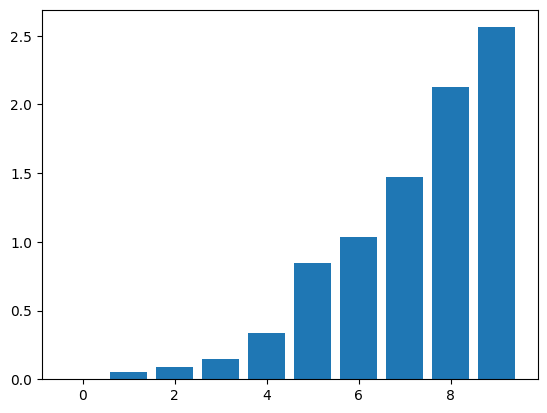

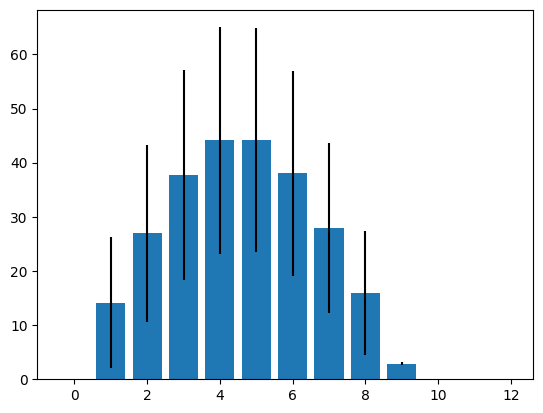

In [32]:
bf(C, h, J, n, dagDist=True)

100%|██████████| 262144/262144 [00:25<00:00, 10235.12it/s]


Brute force results: [('110100001000000011', 254.72469807954087), ('111100001000000011', 254.72469807954087), ('11110001001000001', 254.7545336470057), ('111110001001000001', 254.7545336470057), ('110100101000010011', 254.82112249230983), ('1010000001000101', 254.87086787103718), ('11010000001000101', 254.87086787103718), ('1000000001110', 254.91414837939575), ('100001000000001110', 254.91414837939575), ('100001100000011110', 255.01057279216474), ('110100101000000011', 255.0832272840076), ('111100101000000011', 255.0832272840076), ('111100011010000011', 255.15149001210895), ('11110011011000001', 255.18132557957378), ('111110011011000001', 255.18132557957378), ('1010000101100101', 255.1953912143005), ('1000100101110', 255.23867172265915), ('100001100000001110', 255.2726775838625), ('11010010011000101', 255.2976598036052), ('1010000101000101', 255.32292313351465), ('11010000101000101', 255.32292313351465), ('1000100001110', 255.36620364187328), ('111110101001000001', 255.48305530951723),

100%|██████████| 262144/262144 [00:00<00:00, 340135.44it/s]


110100001000000011 254.72469807954087


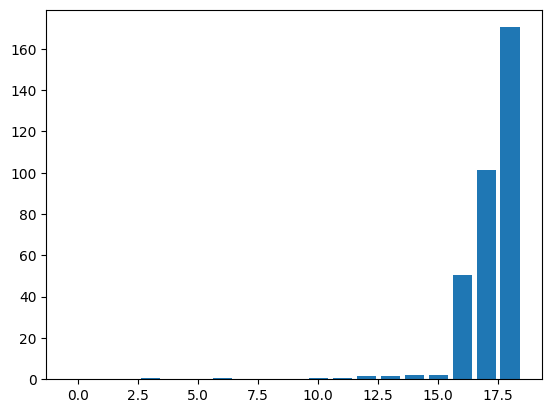

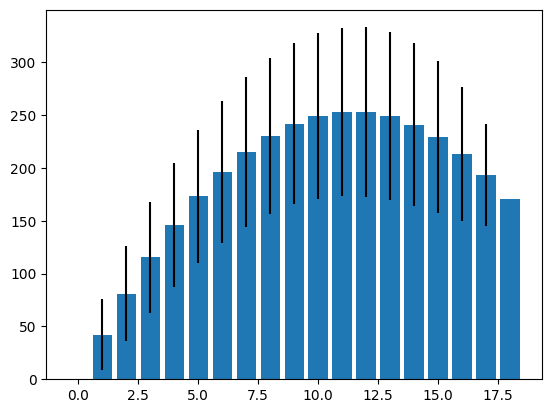

In [22]:
C, h, J = hamiltonian_para(n, m, D, delta_max_i, delta_consist_ij, delta_trans_ijk, 0, None, use_y=False)

bf(C, h, J, n)

100%|██████████| 262144/262144 [00:25<00:00, 10363.37it/s]


Brute force results: [('110100001000000011', 254.72469807954087), ('111100001000000011', 254.72469807954087), ('11110001001000001', 254.7545336470057), ('111110001001000001', 254.7545336470057), ('110100101000010011', 254.82112249230983), ('1010000001000101', 254.87086787103718), ('11010000001000101', 254.87086787103718), ('1000000001110', 254.91414837939575), ('100001000000001110', 254.91414837939575), ('100001100000011110', 255.01057279216474), ('110100101000000011', 255.0832272840076), ('111100101000000011', 255.0832272840076), ('111100011010000011', 255.15149001210895), ('11110011011000001', 255.18132557957378), ('111110011011000001', 255.18132557957378), ('1010000101100101', 255.1953912143005), ('1000100101110', 255.23867172265915), ('100001100000001110', 255.2726775838625), ('11010010011000101', 255.2976598036052), ('1010000101000101', 255.32292313351465), ('11010000101000101', 255.32292313351465), ('1000100001110', 255.36620364187328), ('111110101001000001', 255.48305530951723),

 85%|████████▌ | 223976/262144 [00:02<00:00, 102370.94it/s]

110100001000000011 254.72469807954087


100%|██████████| 262144/262144 [00:02<00:00, 100485.67it/s]


111100001000000011 254.72469807954087


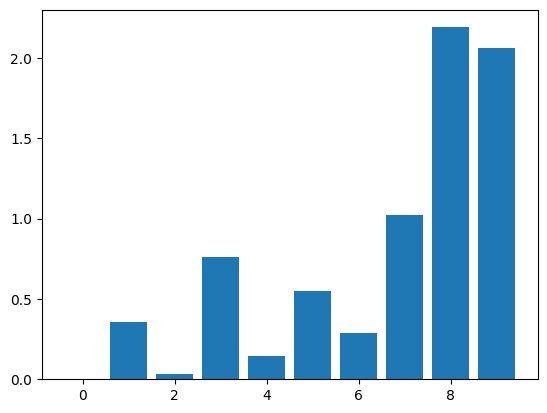

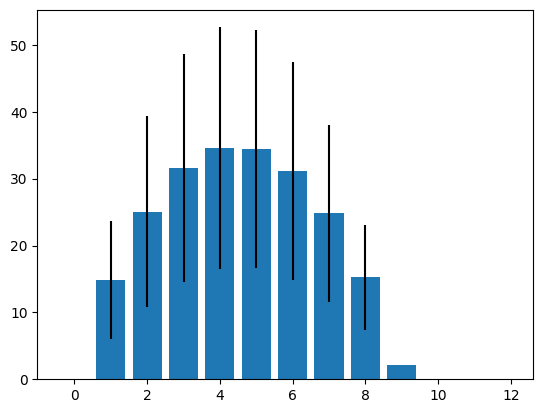

In [27]:
bf(C, h, J, n, dagDist=True)

In [25]:
from tqdm import tqdm
def bf2(C, h, J, n, dagDist = False):
    dlen = n * (n-1) if dagDist else len(h) 
    values = np.zeros((len(h),))
    
    ## To test a bunch of values
    #
    # for s, _ in tests:
    #     if len(s) < len(h):
    #         s = '0' * (len(h) - len(s)) + s
    #     for i in range(len(s)):
    #         values[len(h) - 1 - i] = -1 if s[i] == '0' else 1
    #     value = C + np.inner(h, values) + values.T @ J @ values
    #     print(value)

    bf_results = {}
    for x in tqdm(range(1 << len(h))):
        orig_x = x
        for i in range(len(h)):
            values[i] = -1 if x & 1 == 0 else 1
            x >>= 1
        value = C + np.inner(h, values) + values.T @ J @ values
        bf_results["{:b}".format(orig_x)] = float(value)
    return bf_results['111'], bf_results['1000000010000111']

In [26]:
C, h, J = hamiltonian_para(n, m, D, delta_max_i, delta_consist_ij, delta_trans_ijk, 0, None, use_y=False)

bf2(C, h, J, n)

100%|██████████| 262144/262144 [00:26<00:00, 10033.86it/s]


(255.73076266495775, 256.6157833427587)